<a href="https://colab.research.google.com/github/Shadghawte/machine-learning./blob/main/prac3a(naive_bayesian).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


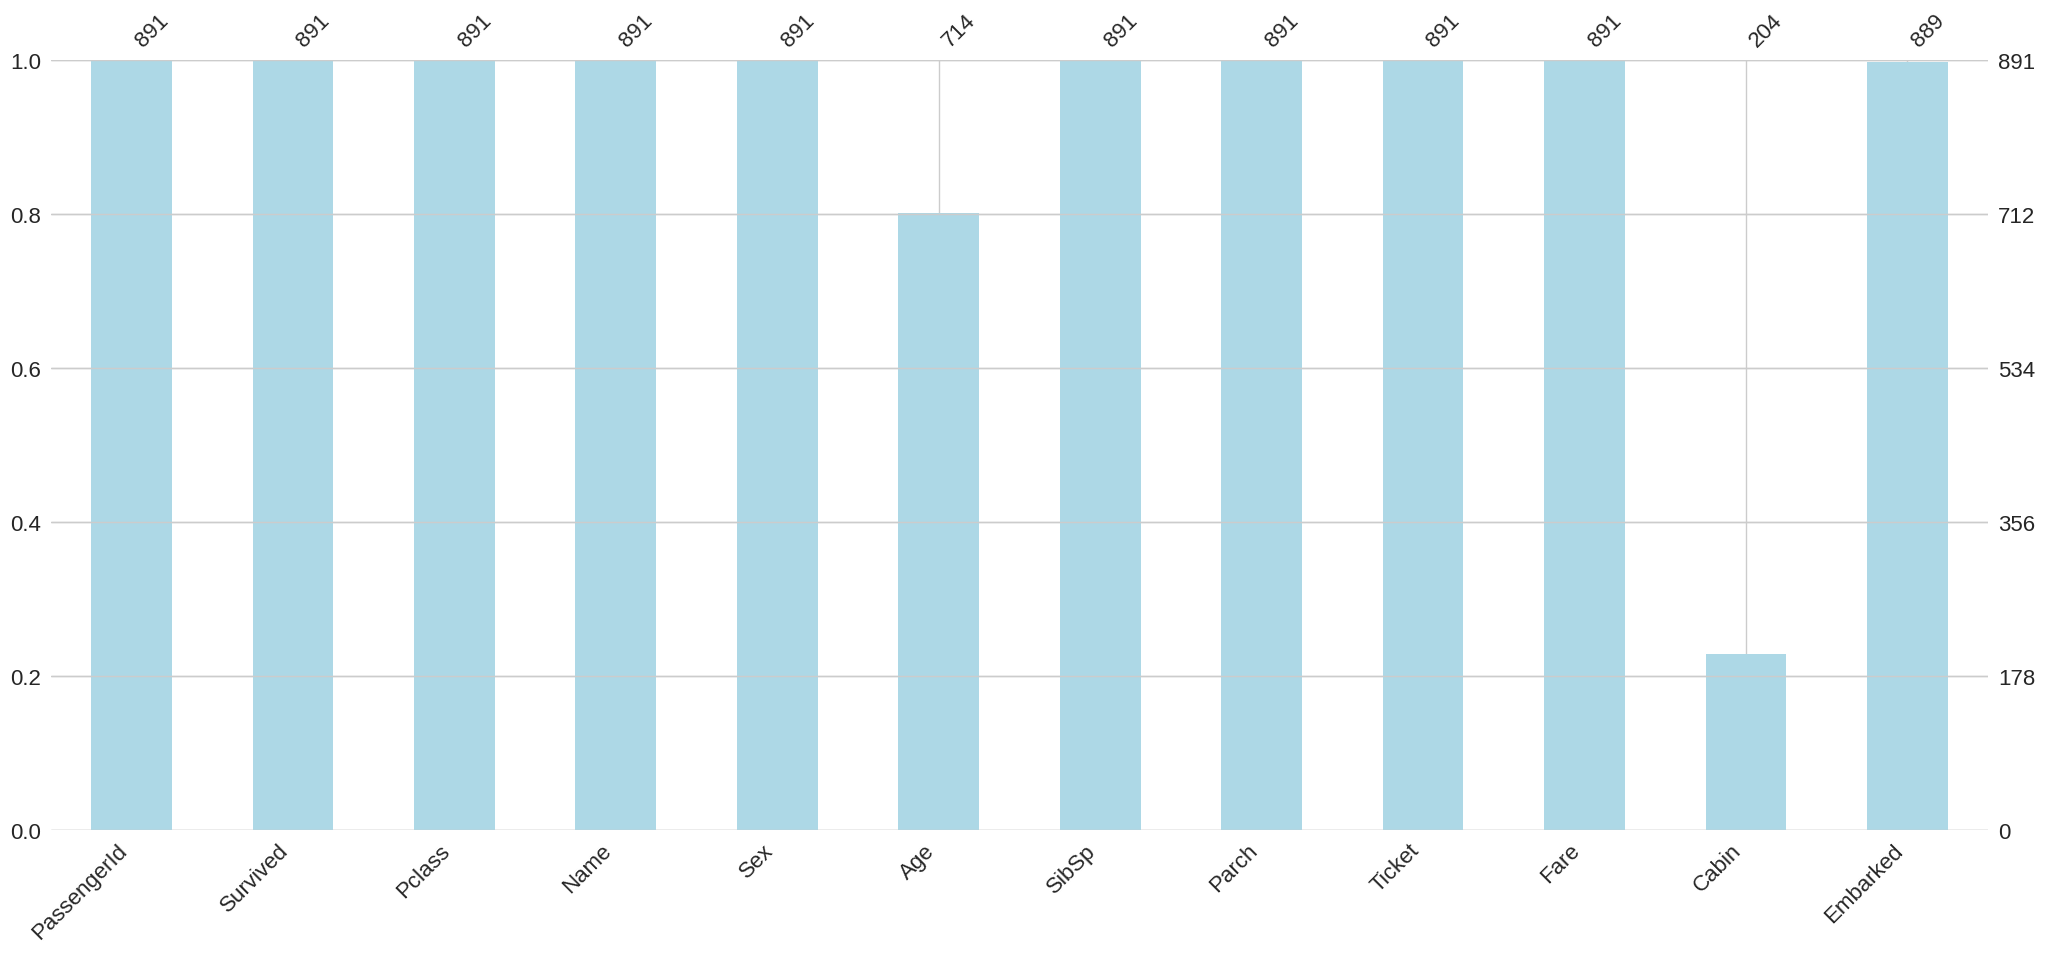

<ipython-input-6-cfedf3568f07>:36: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  resign_corr = df.corr()
<ipython-input-6-cfedf3568f07>:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
<ipython-input-6-cfedf3568f07>:38: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cat_h

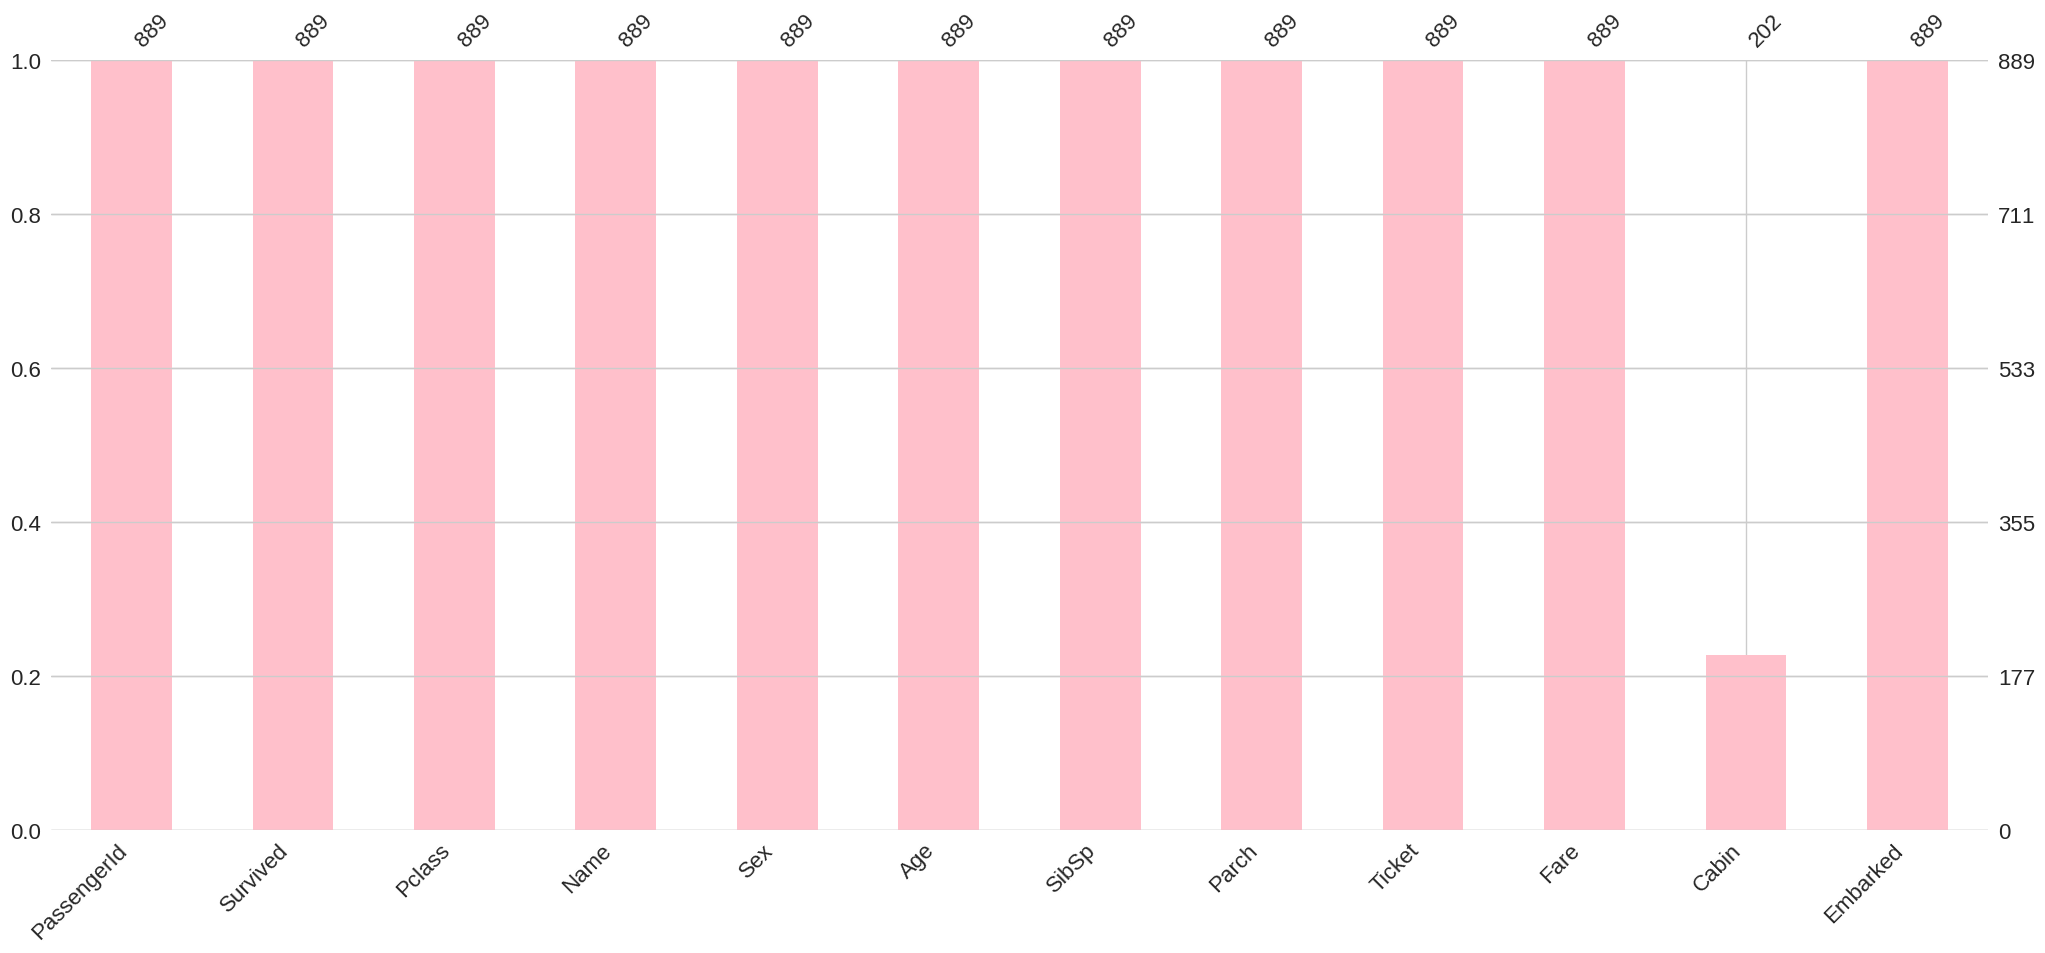

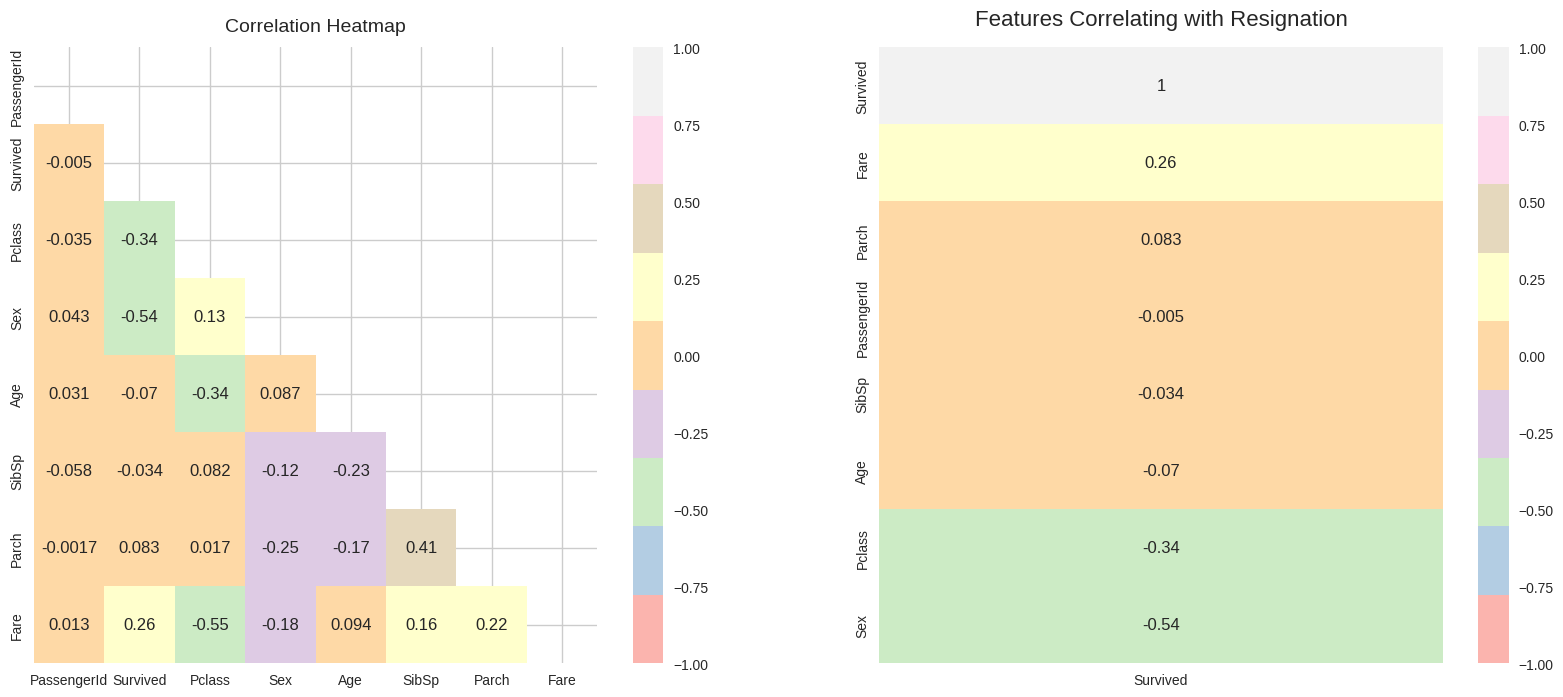

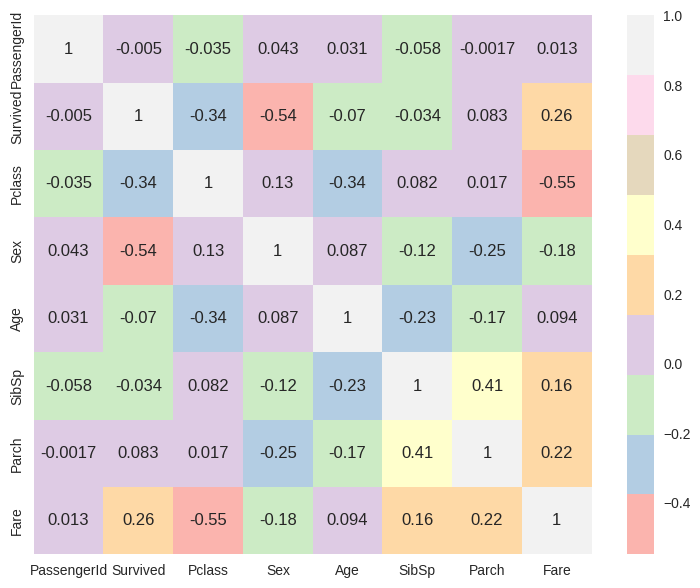

<ipython-input-6-cfedf3568f07>:45: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df.corr(),annot=True,cmap='Pastel1')


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

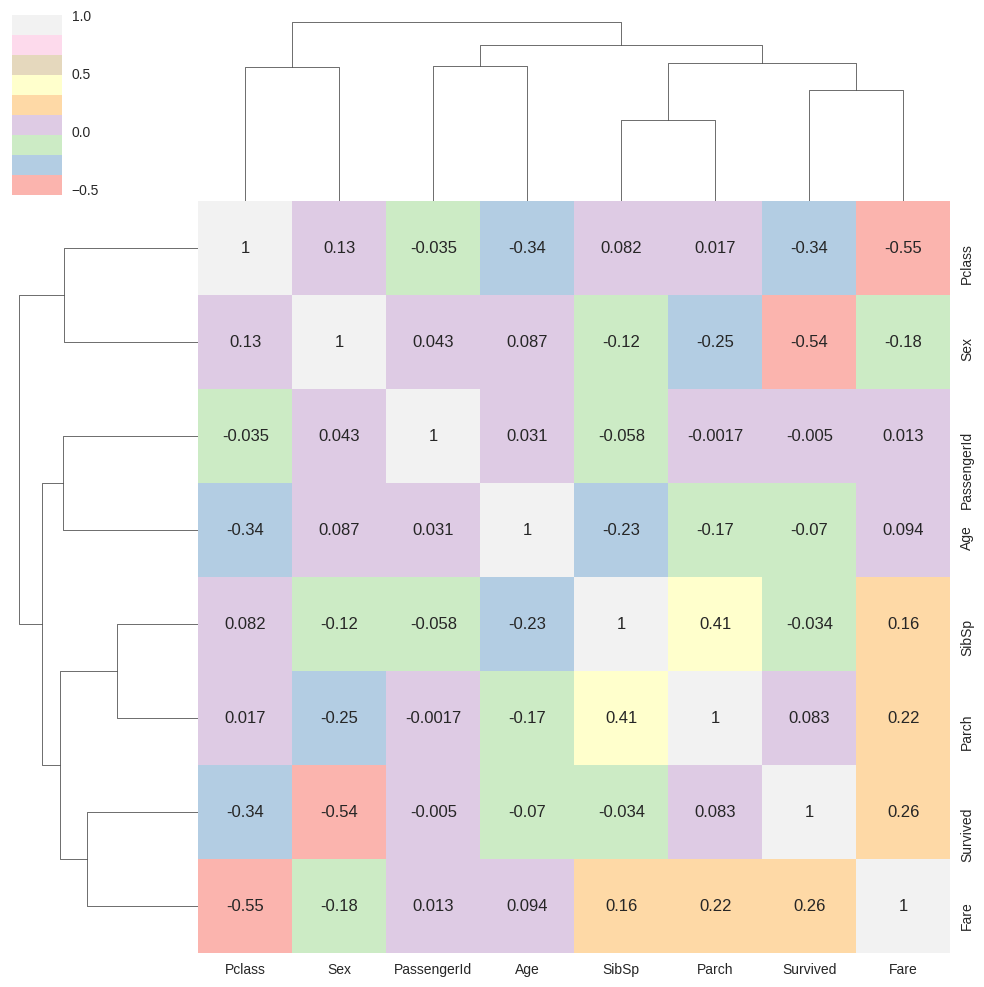

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('train.csv')
df.head()
df.ndim
df.shape
df.columns
df.info()
df.isna().sum()
df.isna().any()
df.describe().transpose()
null_df=pd.DataFrame()
null_df['Features']=df.isnull().sum().index
null_df['Null values']=df.isnull().sum().values
null_df['% Null values']=(df.isnull().sum().values / df.shape[0])*100
null_df.sort_values(by='% Null values',ascending=False)
import missingno as no
no.bar(df,color='lightblue')
plt.show()
df['Age'].fillna(df.Age.median(),inplace=True)
df.Age.isna().any()
df.dropna(subset=['Embarked'],inplace=True)
df.shape
df.isna().sum()
no.bar(df,color='pink')

import  yellowbrick
from sklearn.preprocessing import LabelEncoder
label_Enc =LabelEncoder()
df.Sex =label_Enc.fit_transform(df.Sex)
label_Enc.classes_
df.head()
fig,ax=plt.subplots(ncols=2,figsize=(20,8))
resign_corr = df.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1,annot=True,ax=ax[0],cmap='Pastel1')
cat_heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);
heatmap = sns.heatmap(resign_corr[['Survived']].sort_values(by='Survived',ascending=False),vmin=-1, vmax=1, annot=True,ax=ax[1],cmap='Pastel1')
heatmap.set_title('Features Correlating with Resignation', fontdict={'fontsize':16}, pad=16);
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,cmap='Pastel1')
plt.show()
sns.clustermap(df.corr(),annot=True,cmap='Pastel1')
X=df.drop(['Survived','Name','Ticket','Embarked'],axis=1)
y=df['Survived']
X[:3]
y[:5]

